In [71]:

import warnings 
warnings.filterwarnings('ignore')

from modules.Utils.utils import loadFromDB,strategyTester

import pandas as pd
import numpy as np

In [12]:
for symb in ['AAVE','ADA','ALGO','AVAX','AXS','BTC','DOT','EGLD','ETH','KDA','LINK','MATIC','NEAR','SOL','UNI','XRP']:
    df =loadFromDB(symb,'1d')#.iloc[-300:]
    df['Max_pos_var'] = df.apply(lambda row: (row['High']-row['Open'])/row['Open'],axis=1)
    df['Close_pos_var'] = df.apply(lambda row: (row['Close']-row['Open'])/row['Open'],axis=1)


    TP = df['Max_pos_var'].quantile(0.65)
    equity = 1000
    fees = 0.001
    df['Hits'] = df.apply(lambda row:
                        (row['Open']*(1+TP)-row['Open'])/row['Open'] 
                        if row['High']>=row['Open']*(1+TP) else
                        (row['Close']-row['Open'])/row['Open']
                          ,axis=1)
    
    df['Hits'] = df['Hits']-2*fees
    df['Equity'] = np.nan
    for i in df.index:
        equity = (1+df['Hits'][i])*equity
        df['Equity'][i]=equity
    #df['Equity'].plot()
    #equities.append(equity)
    print(f'{symb} Final balance {equity}')

AAVE Final balance 125.69878100862005
ADA Final balance 73.2443722761726
ALGO Final balance 339.84402001259747
AVAX Final balance 766.5849896245287
AXS Final balance 1189.2160018958393
BTC Final balance 229.67153959125946
DOT Final balance 139.9053675928553
EGLD Final balance 1010.6024734917341
ETH Final balance 349.1339166475675
KDA Final balance 444.0087245941633
LINK Final balance 46.016959340403275
MATIC Final balance 2765.870617602447
NEAR Final balance 172.03427336196478
SOL Final balance 297.61443397707114
UNI Final balance 410.95571399510106
XRP Final balance 126.57447380001368


In [72]:
result_df = pd.DataFrame()
for q in range(10,80,5):
  equities = []
  for symb in ['AAVE','ADA','ALGO','AVAX','AXS','BTC','DOT','EGLD','ETH','KDA','LINK','MATIC','NEAR','SOL','UNI','XRP']:#SYMBOL= 'LINK'
    df =loadFromDB(symb,'1d')
    df['Max_pos_var'] = df.apply(lambda row: (row['High']-row['Open'])/row['Open'],axis=1)
    df['Close_pos_var'] = df.apply(lambda row: (row['Close']-row['Open'])/row['Open'],axis=1)


    TP = df['Max_pos_var'].quantile(q/100)
    equity = 1000
    fees = 0.001
    df['Hits'] = df.apply(lambda row:
                        (row['Open']*(1+TP)-row['Open'])/row['Open'] 
                        if row['High']>=row['Open']*(1+TP) else
                        (row['Close']-row['Open'])/row['Open']
                          ,axis=1)
    
    #df['Hits'] = df['Hits']-2*fees
    df['Equity'] = np.nan
    for i in df.index:
        equity = (1+df['Hits'][i])*equity
        df['Equity'][i]=equity
    #df['Equity'].plot()
    equities.append(equity)
    #print(f'{symb} Final balance {equity}')
  result_df = result_df.append({'avg_equity':np.mean(equities),
                    'std_equity' : np.std(equities),
                    'quantile':q/100},
                               ignore_index=True)  
  
  print(f'Final balance : Avg {np.mean(equities)} - Std {np.std(equities)} - Q {q/100}')
result_df.sort_values(by=['std_equity','avg_equity',], ascending=[False, True])

Final balance : Avg 1402.5021583918115 - Std 758.9315437957143 - Q 0.1
Final balance : Avg 1789.309069856714 - Std 1586.1308025468318 - Q 0.15
Final balance : Avg 1832.9712136252874 - Std 1479.6403380013578 - Q 0.2
Final balance : Avg 1839.0453795480676 - Std 1917.760322655466 - Q 0.25
Final balance : Avg 1644.298890857919 - Std 1601.0589329287686 - Q 0.3
Final balance : Avg 1857.4404574943226 - Std 1667.2018724148566 - Q 0.35
Final balance : Avg 2353.2811926467393 - Std 2810.9930584285967 - Q 0.4
Final balance : Avg 1970.0030325928476 - Std 2034.822833811386 - Q 0.45
Final balance : Avg 1849.3506546896438 - Std 1843.1134281252064 - Q 0.5
Final balance : Avg 1654.9301324809098 - Std 1650.8619726537008 - Q 0.55
Final balance : Avg 1892.3555690433877 - Std 2290.3911352228615 - Q 0.6
Final balance : Avg 2636.3333651632056 - Std 3724.4509184746285 - Q 0.65
Final balance : Avg 2773.1050894185473 - Std 3401.4410243384236 - Q 0.7
Final balance : Avg 2922.4365866896387 - Std 3668.9451905292894

,avg_equity,std_equity,quantile
11,2636.333365,3724.450918,0.65
13,2922.436587,3668.945191,0.75
12,2773.105089,3401.441024,0.70
6,2353.281193,2810.993058,0.40
10,1892.355569,2290.391135,0.60
7,1970.003033,2034.822834,0.45
3,1839.045380,1917.760323,0.25
8,1849.350655,1843.113428,0.50
5,1857.440457,1667.201872,0.35
9,1654.930132,1650.861973,0.55


In [ ]:
SYMBOL= 'BTC'
df =loadFromDB(SYMBOL,'5m')

df['10_period_return'] = df.Close/df.Close.shift(10)-1
df['5_period_return'] = df.Close/df.Close.shift(5)-1
df.dropna(inplace=True)
print(df.shape)
df.head()

In [ ]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row['5_period_return'] < -0.015 and row['10_period_return']>0 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
     return False

strategyTester(df,buyCondition,sellCondition,equity=1000, stop_loss= True, take_profit= True, tp=0.01, sl=0.005)

# OLR Regressor

In [38]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant 

SYMBOL= 'BTC'
df =loadFromDB(SYMBOL,'1h').iloc[-6000:]
df.head()

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2022-02-16 08:00:00,44184.19,44327.55,44130.70,44147.08,1086.86338,1644998400
2022-02-16 09:00:00,44147.09,44236.09,43992.99,44005.23,848.19513,1645002000
2022-02-16 10:00:00,44005.23,44128.13,43876.00,44111.61,975.15668,1645005600
2022-02-16 11:00:00,44111.61,44260.00,44107.17,44173.15,808.63663,1645009200
2022-02-16 12:00:00,44173.15,44214.11,43964.42,44032.98,836.47723,1645012800


In [39]:
def computeLaggingLinearRegression(df:pd.DataFrame, col:str="Close",window:int=15,)->pd.DataFrame:
    """Compute a lagging moving regression on a column with a window.

    Args:
        df (pd.DataFrame): The dataframe containing features.
        col (str, optional): The column we apply Linear regression on. Defaults to "Close.
        window (int, optional): The window we apply linear regression on. Defaults to 15.

    Returns:
        pd.DataFrame: The entry DataFrame we another column called B_MLR_coefs
    """  
    def computeLinearRegression(to_predict)->float:
        """Compute simple linear regression between 2 vectors x and y

        Args:
            to_predict (np.array): x vector

        Returns:
            float: The coefficient a corresponding to the linear regression y=ax+b.
        """
        model = OLS(to_predict,add_constant(tuple(range(len(to_predict))))).fit()
        return model.predict()[-1]
    
    df['LSMA'] = np.nan
    df['LSMA'].iloc[window:] = [computeL35inearRegression(df[col].values[i-window:i]) for i in range(window,len(df))] 

    return df.dropna()

In [40]:
df = computeLaggingLinearRegression(df)
df.head()

,Open,High,Low,Close,Volume,Timestamp,LSMA
Date,,,,,,,
2022-02-16 23:00:00,44010.50,44168.64,43823.09,43873.56,648.48745,1645052400,43885.287250
2022-02-17 00:00:00,43873.56,44100.23,43822.28,44060.74,840.53758,1645056000,43907.901833
2022-02-17 01:00:00,44060.75,44164.71,43968.58,44006.09,798.91910,1645059600,43963.676250
2022-02-17 02:00:00,44006.09,44095.73,43824.68,43995.48,848.14420,1645063200,44019.039833
2022-02-17 03:00:00,43995.48,44010.00,43575.04,43583.05,1057.71326,1645066800,44082.682667


In [69]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.Close<row.LSMA else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.Close>row.LSMA else False

SYMBOL= 'BTC'
df =loadFromDB(SYMBOL,'1h')
df = computeLaggingLinearRegression(df,'Close',95)

result = pd.DataFrame()
trade_dict = {}
fees = 0.001
equity = 1000
opened = False

for index, row in df.iterrows():
    if not opened and buyCondition(row):
        trade_dict['buy_price'] = row.Close
        trade_dict['buy_date'] = index
        opened = True
    elif opened and sellCondition(row):
        trade_dict['sell_price'] = row.Close
        trade_dict['sell_date'] = index
        equity = (1+(trade_dict['sell_price']-trade_dict['buy_price'])/trade_dict['buy_price'])*equity
        trade_dict['equity'] = equity
        trade_dict['comment'] = "SELL"
        result = result.append(trade_dict,ignore_index=True)
        opened = False
        trade_dict = {}
        
print(f'Final equity : {equity:.0f} USDT, BH Return : {(100*(df.iloc[0].Open-df.iloc[-1].Close)/df.iloc[0].Open)-100:.0f} %')     

Final equity : 1595 USDT, BH Return : -18 %


In [66]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.Close<row.LSMA else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.Close>row.LSMA else False

for i in range(5,400,10): #W=95
    SYMBOL= 'BTC'
    df =loadFromDB(SYMBOL,'1h').iloc[-5000:]
    df = computeLaggingLinearRegression(df,'Close',i)

    result = pd.DataFrame()
    trade_dict = {}
    fees = 0.001
    equity = 1000
    opened = False

    for index, row in df.iterrows():
        if not opened and buyCondition(row):
            trade_dict['buy_price'] = row.Close
            trade_dict['buy_date'] = index
            opened = True
        elif opened and sellCondition(row):
            trade_dict['sell_price'] = row.Close
            trade_dict['sell_date'] = index
            equity = (1+(trade_dict['sell_price']-trade_dict['buy_price'])/trade_dict['buy_price'])*equity
            trade_dict['equity'] = equity
            trade_dict['comment'] = "SELL"
            result = result.append(trade_dict,ignore_index=True)
            opened = False
            trade_dict = {}
    result['time_diff'] = result.apply(lambda x: x.sell_date-x.buy_date, axis=1)
    print(f'W {i} Final equity : {equity:.0f} USDT, BH Return : {(100*(df.iloc[0].Open-df.iloc[-1].Close)/df.iloc[0].Open)-100:.0f} %')     

W 5 Final equity : 505 USDT, BH Return : -41 %
W 15 Final equity : 843 USDT, BH Return : -41 %
W 25 Final equity : 541 USDT, BH Return : -41 %
W 35 Final equity : 465 USDT, BH Return : -41 %
W 45 Final equity : 529 USDT, BH Return : -42 %
W 55 Final equity : 816 USDT, BH Return : -43 %
W 65 Final equity : 785 USDT, BH Return : -42 %
W 75 Final equity : 920 USDT, BH Return : -41 %
W 85 Final equity : 870 USDT, BH Return : -41 %
W 95 Final equity : 1284 USDT, BH Return : -42 %
W 105 Final equity : 1122 USDT, BH Return : -42 %
W 115 Final equity : 979 USDT, BH Return : -41 %
W 125 Final equity : 834 USDT, BH Return : -42 %
W 135 Final equity : 786 USDT, BH Return : -42 %
W 145 Final equity : 815 USDT, BH Return : -41 %
W 155 Final equity : 827 USDT, BH Return : -41 %
W 165 Final equity : 726 USDT, BH Return : -42 %
W 175 Final equity : 691 USDT, BH Return : -42 %
W 185 Final equity : 651 USDT, BH Return : -44 %
W 195 Final equity : 581 USDT, BH Return : -44 %
W 205 Final equity : 572 USDT

<AxesSubplot: xlabel='Date'>

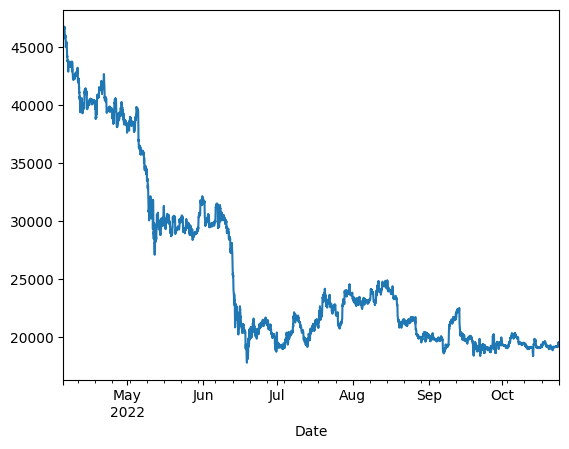

In [64]:
df.Close.plot()

<AxesSubplot: >

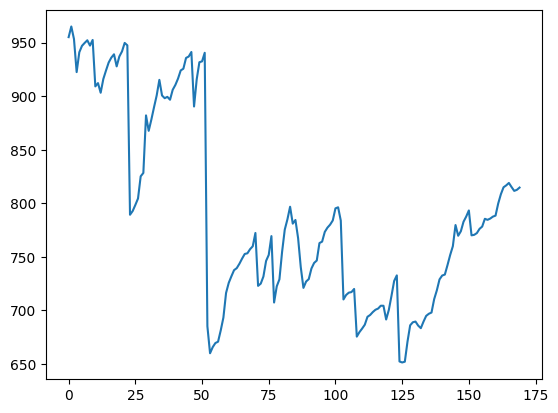

In [65]:
result.equity.plot()